In [1]:
import os
import copy
from matplotlib import pyplot as plt
from cascade.cascade import Cascade
import numpy as np
import cmocean
from cascade.tools import outwash_plotters as out_plt
from cascade.tools import plotters as cascade_plt

# B3D Only: Outwash module set to false

In [2]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_b3d_only = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-left-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=False,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_6min_20yrs.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=100,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=3.65E-3,
    cx=0.675
)

In [3]:
for time_step in range(cascade_b3d_only._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_b3d_only.update()
    if cascade_b3d_only.b3d_break:
        break

 Time Step:  99Time Step:  36

Text(0, 0.5, 'shoreline position')

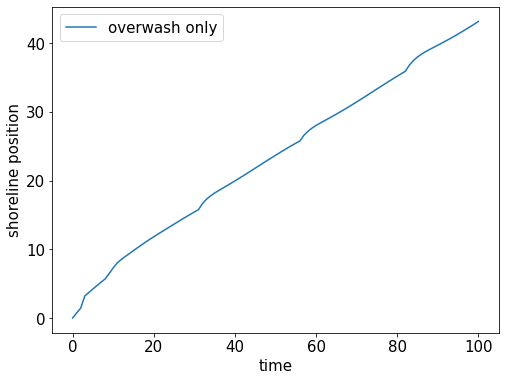

In [4]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

m_xsTS = np.subtract(cascade_b3d_only.barrier3d[0].x_s_TS, cascade_b3d_only.barrier3d[0].x_s_TS[0])
m_xsTS = np.multiply(m_xsTS,10)

plt.plot(m_xsTS, label="overwash only")
plt.legend()
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
# plt.savefig(newpath + "shoreline_position", facecolor='w')

# 100% to shoreface

In [5]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash100 = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-left-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_6min_20yrs.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=100,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=3.65E-3,
    cx=0.675
)

In [6]:
for time_step in range(cascade_outwash100._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_outwash100.update()
    if cascade_outwash100.b3d_break:
        break

 Time Step:  19Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  804
Outwasher Time Step:  805
Outwasher Time Step:  806
Outwasher Time Step:  807
Outwasher Time Step:  808
Outwasher Time Step:  809
Outwasher Time Step:  810
Outwasher Time Step:  811
Outwasher Time Step:  812
Outwasher Time Step:  813
Outwasher Time Step:  814
Outwasher Time Step:  815
Outwasher Time Step:  816
Outwasher Time Step:  817
Outwasher Time Step:  818
Outwasher Time Step:  819
Outwasher Time Step:  820
Outwasher Time Step:  821
Outwasher Time Step:  822
Outwasher Time Step:  823
Outwasher Time Step:  824
Outwasher Time Step:  825
Outwasher Time Step:  826
Outwasher Time Step:  827
Outwasher Time Step:  828
Outwasher Time Step:  829
Outwasher Time Step:  830
Outwasher Time Step:  831
Outwasher Time Step:  832
Outwasher Time Step:  833
Outwasher Time Step:  834
Outwasher Time Step:  835
Outwasher Time Step:  836
Outwasher Time Step:  837
Outwasher Time Step:  838
Outwasher Time Step:  839
Outwasher Time Step:  840
Outwasher Time Step:  841
Outwasher Ti

 Time Step:  39Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Time Step:  673
Outwasher Time Step:  674
Outwasher Time Step:  675
Outwasher Time Step:  676
Outwasher Time Step:  677
Outwasher Time Step:  678
Outwasher Time Step:  679
Outwasher Time Step:  680
Outwasher Time Step:  681
Outwasher Time Step:  682
Outwasher Time Step:  683
Outwasher Time Step:  684
Outwasher Time Step:  685
Outwasher Time Step:  686
Outwasher Time Step:  687
Outwasher Time Step:  688
Outwasher Time Step:  689
Outwasher Time Step:  690
Outwasher Time Step:  691
Outwasher Time Step:  692
Outwasher Time Step:  693
Outwasher Time Step:  694
Outwasher Time Step:  695
Outwasher Time Step:  696
Outwasher Time Step:  697
Outwasher Time Step:  698
Outwasher Time Step:  699
Outwasher Time Step:  700
Outwasher Time Step:  701
Outwasher Time Step:  702
Outwasher Time Step:  703
Outwasher Ti

Outwasher Time Step:  1386
Outwasher Time Step:  1387
Outwasher Time Step:  1388
Outwasher Time Step:  1389
Outwasher Time Step:  1390
Outwasher Time Step:  1391
Outwasher Time Step:  1392
Outwasher Time Step:  1393
Outwasher Time Step:  1394
Outwasher Time Step:  1395
Outwasher Time Step:  1396
Outwasher Time Step:  1397
Outwasher Time Step:  1398
Outwasher Time Step:  1399
Outwasher Time Step:  1400
Outwasher Time Step:  1401
Outwasher Time Step:  1402
Outwasher Time Step:  1403
Outwasher Time Step:  1404
Outwasher Time Step:  1405
Outwasher Time Step:  1406
Outwasher Time Step:  1407
Outwasher Time Step:  1408
Outwasher Time Step:  1409
Outwasher Time Step:  1410
Outwasher Time Step:  1411
Outwasher Time Step:  1412
Outwasher Time Step:  1413
Outwasher Time Step:  1414
Outwasher Time Step:  1415
Outwasher Time Step:  1416
Outwasher Time Step:  1417
Outwasher Time Step:  1418
Outwasher Time Step:  1419
Outwasher Time Step:  1420
Outwasher Time Step:  1421
Outwasher Time Step:  1422
O

Outwasher Time Step:  801
Outwasher Time Step:  802
Outwasher Time Step:  803
Outwasher Time Step:  804
Outwasher Time Step:  805
Outwasher Time Step:  806
Outwasher Time Step:  807
Outwasher Time Step:  808
Outwasher Time Step:  809
Outwasher Time Step:  810
Outwasher Time Step:  811
Outwasher Time Step:  812
Outwasher Time Step:  813
Outwasher Time Step:  814
Outwasher Time Step:  815
Outwasher Time Step:  816
Outwasher Time Step:  817
Outwasher Time Step:  818
Outwasher Time Step:  819
Outwasher Time Step:  820
Outwasher Time Step:  821
Outwasher Time Step:  822
Outwasher Time Step:  823
Outwasher Time Step:  824
Outwasher Time Step:  825
Outwasher Time Step:  826
Outwasher Time Step:  827
Outwasher Time Step:  828
Outwasher Time Step:  829
Outwasher Time Step:  830
Outwasher Time Step:  831
Outwasher Time Step:  832
Outwasher Time Step:  833
Outwasher Time Step:  834
Outwasher Time Step:  835
Outwasher Time Step:  836
Outwasher Time Step:  837
Outwasher Time Step:  838
Outwasher Ti

 Time Step:  79Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  686
Outwasher Time Step:  687
Outwasher Time Step:  688
Outwasher Time Step:  689
Outwasher Time Step:  690
Outwasher Time Step:  691
Outwasher Time Step:  692
Outwasher Time Step:  693
Outwasher Time Step:  694
Outwasher Time Step:  695
Outwasher Time Step:  696
Outwasher Time Step:  697
Outwasher Time Step:  698
Outwasher Time Step:  699
Outwasher Time Step:  700
Outwasher Time Step:  701
Outwasher Time Step:  702
Outwasher Time Step:  703
Outwasher Time Step:  704
Outwasher Time Step:  705
Outwasher Time Step:  706
Outwasher Time Step:  707
Outwasher Time Step:  708
Outwasher Time Step:  709
Outwasher Time Step:  710
Outwasher Time Step:  711
Outwasher Time Step:  712
Outwasher Time Step:  713
Outwasher Time Step:  714
Outwasher Time Step:  715
Outwasher Time Step:  716
Outwasher Time Step:  717
Outwasher Time Step:  718
Outwasher Time Step:  719
Outwasher Time Step:  720
Outwasher Time Step:  721
Outwasher Time Step:  722
Outwasher Time Step:  723
Outwasher Ti

 Time Step:  99Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  848
Outwasher Time Step:  849
Outwasher Time Step:  850
Outwasher Time Step:  851
Outwasher Time Step:  852
Outwasher Time Step:  853
Outwasher Time Step:  854
Outwasher Time Step:  855
Outwasher Time Step:  856
Outwasher Time Step:  857
Outwasher Time Step:  858
Outwasher Time Step:  859
Outwasher Time Step:  860
Outwasher Time Step:  861
Outwasher Time Step:  862
Outwasher Time Step:  863
Outwasher Time Step:  864
Outwasher Time Step:  865
Outwasher Time Step:  866
Outwasher Time Step:  867
Outwasher Time Step:  868
Outwasher Time Step:  869
Outwasher Time Step:  870
Outwasher Time Step:  871
Outwasher Time Step:  872
Outwasher Time Step:  873
Outwasher Time Step:  874
Outwasher Time Step:  875
Outwasher Time Step:  876
Outwasher Time Step:  877
Outwasher Time Step:  878
Outwasher Time Step:  879
Outwasher Time Step:  880
Outwasher Time Step:  881
Outwasher Time Step:  882
Outwasher Time Step:  883
Outwasher Time Step:  884
Outwasher Time Step:  885
Outwasher Ti

Text(0, 0.5, 'shoreline position')

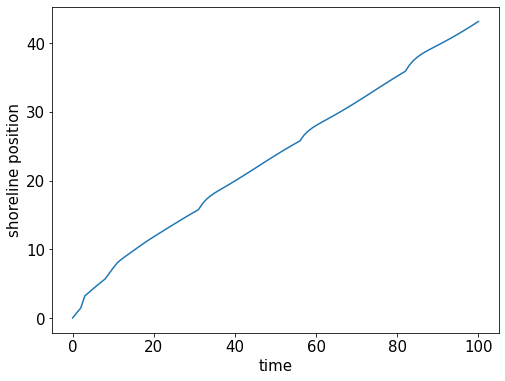

In [7]:
m_xsTS_100 = np.subtract(cascade_outwash100.barrier3d[0].x_s_TS, cascade_outwash100.barrier3d[0].x_s_TS[0])
m_xsTS_100 = np.multiply(m_xsTS_100,10)

plt.plot(m_xsTS_100)
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")


In [8]:
cascade_outwash100.barrier3d[0].BermEl

0.10999999999999999

Text(0.5, 1.0, 'Outwash to Shoreface')

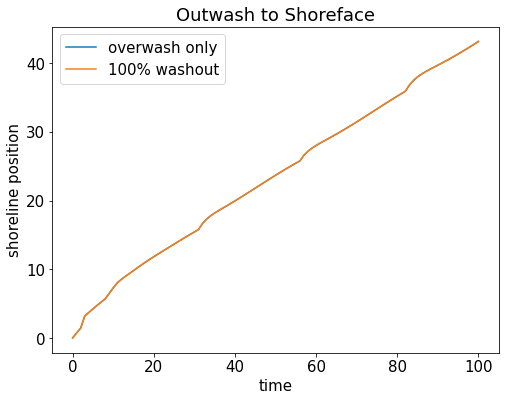

In [9]:
plt.plot(m_xsTS, label="overwash only")
plt.plot(m_xsTS_100, label="100% washout")
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=580, colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
# plt.ylim([500, 580])
plt.legend()
plt.title("Outwash to Shoreface")



# 50% Outwash to shoreface

In [10]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash50 = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-left-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_6min_20yrs.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=50,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=3.65E-3,
    cx=0.675
)

In [11]:
for time_step in range(cascade_outwash50._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_outwash50.update()
    if cascade_outwash50.b3d_break:
        break

 Time Step:  19Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  849
Outwasher Time Step:  850
Outwasher Time Step:  851
Outwasher Time Step:  852
Outwasher Time Step:  853
Outwasher Time Step:  854
Outwasher Time Step:  855
Outwasher Time Step:  856
Outwasher Time Step:  857
Outwasher Time Step:  858
Outwasher Time Step:  859
Outwasher Time Step:  860
Outwasher Time Step:  861
Outwasher Time Step:  862
Outwasher Time Step:  863
Outwasher Time Step:  864
Outwasher Time Step:  865
Outwasher Time Step:  866
Outwasher Time Step:  867
Outwasher Time Step:  868
Outwasher Time Step:  869
Outwasher Time Step:  870
Outwasher Time Step:  871
Outwasher Time Step:  872
Outwasher Time Step:  873
Outwasher Time Step:  874
Outwasher Time Step:  875
Outwasher Time Step:  876
Outwasher Time Step:  877
Outwasher Time Step:  878
Outwasher Time Step:  879
Outwasher Time Step:  880
Outwasher Time Step:  881
Outwasher Time Step:  882
Outwasher Time Step:  883
Outwasher Time Step:  884
Outwasher Time Step:  885
Outwasher Time Step:  886
Outwasher Ti

 Time Step:  39Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  776
Outwasher Time Step:  777
Outwasher Time Step:  778
Outwasher Time Step:  779
Outwasher Time Step:  780
Outwasher Time Step:  781
Outwasher Time Step:  782
Outwasher Time Step:  783
Outwasher Time Step:  784
Outwasher Time Step:  785
Outwasher Time Step:  786
Outwasher Time Step:  787
Outwasher Time Step:  788
Outwasher Time Step:  789
Outwasher Time Step:  790
Outwasher Time Step:  791
Outwasher Time Step:  792
Outwasher Time Step:  793
Outwasher Time Step:  794
Outwasher Time Step:  795
Outwasher Time Step:  796
Outwasher Time Step:  797
Outwasher Time Step:  798
Outwasher Time Step:  799
Outwasher Time Step:  800
Outwasher Time Step:  801
Outwasher Time Step:  802
Outwasher Time Step:  803
Outwasher Time Step:  804
Outwasher Time Step:  805
Outwasher Time Step:  806
Outwasher Time Step:  807
Outwasher Time Step:  808
Outwasher Time Step:  809
Outwasher Time Step:  810
Outwasher Time Step:  811
Outwasher Time Step:  812
Outwasher Time Step:  813
Outwasher Ti

 Time Step:  59Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  749
Outwasher Time Step:  750
Outwasher Time Step:  751
Outwasher Time Step:  752
Outwasher Time Step:  753
Outwasher Time Step:  754
Outwasher Time Step:  755
Outwasher Time Step:  756
Outwasher Time Step:  757
Outwasher Time Step:  758
Outwasher Time Step:  759
Outwasher Time Step:  760
Outwasher Time Step:  761
Outwasher Time Step:  762
Outwasher Time Step:  763
Outwasher Time Step:  764
Outwasher Time Step:  765
Outwasher Time Step:  766
Outwasher Time Step:  767
Outwasher Time Step:  768
Outwasher Time Step:  769
Outwasher Time Step:  770
Outwasher Time Step:  771
Outwasher Time Step:  772
Outwasher Time Step:  773
Outwasher Time Step:  774
Outwasher Time Step:  775
Outwasher Time Step:  776
Outwasher Time Step:  777
Outwasher Time Step:  778
Outwasher Time Step:  779
Outwasher Time Step:  780
Outwasher Time Step:  781
Outwasher Time Step:  782
Outwasher Time Step:  783
Outwasher Time Step:  784
Outwasher Time Step:  785
Outwasher Time Step:  786
Outwasher Ti

 Time Step:  79Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  784
Outwasher Time Step:  785
Outwasher Time Step:  786
Outwasher Time Step:  787
Outwasher Time Step:  788
Outwasher Time Step:  789
Outwasher Time Step:  790
Outwasher Time Step:  791
Outwasher Time Step:  792
Outwasher Time Step:  793
Outwasher Time Step:  794
Outwasher Time Step:  795
Outwasher Time Step:  796
Outwasher Time Step:  797
Outwasher Time Step:  798
Outwasher Time Step:  799
Outwasher Time Step:  800
Outwasher Time Step:  801
Outwasher Time Step:  802
Outwasher Time Step:  803
Outwasher Time Step:  804
Outwasher Time Step:  805
Outwasher Time Step:  806
Outwasher Time Step:  807
Outwasher Time Step:  808
Outwasher Time Step:  809
Outwasher Time Step:  810
Outwasher Time Step:  811
Outwasher Time Step:  812
Outwasher Time Step:  813
Outwasher Time Step:  814
Outwasher Time Step:  815
Outwasher Time Step:  816
Outwasher Time Step:  817
Outwasher Time Step:  818
Outwasher Time Step:  819
Outwasher Time Step:  820
Outwasher Time Step:  821
Outwasher Ti

 Time Step:  99Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  867
Outwasher Time Step:  868
Outwasher Time Step:  869
Outwasher Time Step:  870
Outwasher Time Step:  871
Outwasher Time Step:  872
Outwasher Time Step:  873
Outwasher Time Step:  874
Outwasher Time Step:  875
Outwasher Time Step:  876
Outwasher Time Step:  877
Outwasher Time Step:  878
Outwasher Time Step:  879
Outwasher Time Step:  880
Outwasher Time Step:  881
Outwasher Time Step:  882
Outwasher Time Step:  883
Outwasher Time Step:  884
Outwasher Time Step:  885
Outwasher Time Step:  886
Outwasher Time Step:  887
Outwasher Time Step:  888
Outwasher Time Step:  889
Outwasher Time Step:  890
Outwasher Time Step:  891
Outwasher Time Step:  892
Outwasher Time Step:  893
Outwasher Time Step:  894
Outwasher Time Step:  895
Outwasher Time Step:  896
Outwasher Time Step:  897
Outwasher Time Step:  898
Outwasher Time Step:  899
Outwasher Time Step:  900
Outwasher Time Step:  901
Outwasher Time Step:  902
Outwasher Time Step:  903
Outwasher Time Step:  904
Outwasher Ti

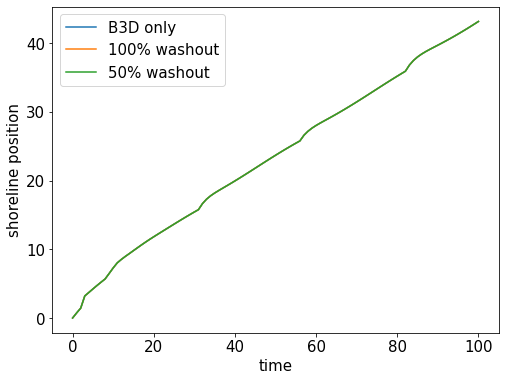

In [12]:
m_xsTS_50 = np.subtract(cascade_outwash50.barrier3d[0].x_s_TS, cascade_outwash50.barrier3d[0].x_s_TS[0])
m_xsTS_50 = np.multiply(m_xsTS_50,10)

# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=max(m_xsTS3), colors='r', linestyles='dotted')
# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=580, colors='r', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")

plt.plot(m_xsTS, label="B3D only")
plt.plot(m_xsTS_100, label="100% washout")
plt.plot(m_xsTS_50, label="50% washout")
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=580, colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
plt.legend()
# plt.savefig(r"D:\NC State\Outwasher\Output\newest_flow_routing\shoreface_nourishment_comparison_substep20.png", facecolor='w')

# washout lost

In [13]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash0 = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-left-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_6min_20yrs.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=0,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=3.65E-3,
    cx=0.675
)

In [14]:
for time_step in range(cascade_outwash0._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_outwash0.update()
    if cascade_outwash0.b3d_break:
        break

 Time Step:  19Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  683
Outwasher Time Step:  684
Outwasher Time Step:  685
Outwasher Time Step:  686
Outwasher Time Step:  687
Outwasher Time Step:  688
Outwasher Time Step:  689
Outwasher Time Step:  690
Outwasher Time Step:  691
Outwasher Time Step:  692
Outwasher Time Step:  693
Outwasher Time Step:  694
Outwasher Time Step:  695
Outwasher Time Step:  696
Outwasher Time Step:  697
Outwasher Time Step:  698
Outwasher Time Step:  699
Outwasher Time Step:  700
Outwasher Time Step:  701
Outwasher Time Step:  702
Outwasher Time Step:  703
Outwasher Time Step:  704
Outwasher Time Step:  705
Outwasher Time Step:  706
Outwasher Time Step:  707
Outwasher Time Step:  708
Outwasher Time Step:  709
Outwasher Time Step:  710
Outwasher Time Step:  711
Outwasher Time Step:  712
Outwasher Time Step:  713
Outwasher Time Step:  714
Outwasher Time Step:  715
Outwasher Time Step:  716
Outwasher Time Step:  717
Outwasher Time Step:  718
Outwasher Time Step:  719
Outwasher Time Step:  720
Outwasher Ti

Outwasher Time Step:  1402
Outwasher Time Step:  1403
Outwasher Time Step:  1404
Outwasher Time Step:  1405
Outwasher Time Step:  1406
Outwasher Time Step:  1407
Outwasher Time Step:  1408
Outwasher Time Step:  1409
Outwasher Time Step:  1410
Outwasher Time Step:  1411
Outwasher Time Step:  1412
Outwasher Time Step:  1413
Outwasher Time Step:  1414
Outwasher Time Step:  1415
Outwasher Time Step:  1416
Outwasher Time Step:  1417
Outwasher Time Step:  1418
Outwasher Time Step:  1419
Outwasher Time Step:  1420
Outwasher Time Step:  1421
Outwasher Time Step:  1422
Outwasher Time Step:  1423
Outwasher Time Step:  1424
Outwasher Time Step:  1425
Outwasher Time Step:  1426
Outwasher Time Step:  1427
Outwasher Time Step:  1428
Outwasher Time Step:  1429
Outwasher Time Step:  1430
Outwasher Time Step:  1431
Outwasher Time Step:  1432
Outwasher Time Step:  1433
Outwasher Time Step:  1434
Outwasher Time Step:  1435
Outwasher Time Step:  1436
Outwasher Time Step:  1437
Outwasher Time Step:  1438
O

Outwasher Time Step:  529
Outwasher Time Step:  530
Outwasher Time Step:  531
Outwasher Time Step:  532
Outwasher Time Step:  533
Outwasher Time Step:  534
Outwasher Time Step:  535
Outwasher Time Step:  536
Outwasher Time Step:  537
Outwasher Time Step:  538
Outwasher Time Step:  539
Outwasher Time Step:  540
Outwasher Time Step:  541
Outwasher Time Step:  542
Outwasher Time Step:  543
Outwasher Time Step:  544
Outwasher Time Step:  545
Outwasher Time Step:  546
Outwasher Time Step:  547
Outwasher Time Step:  548
Outwasher Time Step:  549
Outwasher Time Step:  550
Outwasher Time Step:  551
Outwasher Time Step:  552
Outwasher Time Step:  553
Outwasher Time Step:  554
Outwasher Time Step:  555
Outwasher Time Step:  556
Outwasher Time Step:  557
Outwasher Time Step:  558
Outwasher Time Step:  559
Outwasher Time Step:  560
Outwasher Time Step:  561
Outwasher Time Step:  562
Outwasher Time Step:  563
Outwasher Time Step:  564
Outwasher Time Step:  565
Outwasher Time Step:  566
Outwasher Ti

Outwasher Time Step:  1008
Outwasher Time Step:  1009
Outwasher Time Step:  1010
Outwasher Time Step:  1011
Outwasher Time Step:  1012
Outwasher Time Step:  1013
Outwasher Time Step:  1014
Outwasher Time Step:  1015
Outwasher Time Step:  1016
Outwasher Time Step:  1017
Outwasher Time Step:  1018
Outwasher Time Step:  1019
Outwasher Time Step:  1020
Outwasher Time Step:  1021
Outwasher Time Step:  1022
Outwasher Time Step:  1023
Outwasher Time Step:  1024
Outwasher Time Step:  1025
Outwasher Time Step:  1026
Outwasher Time Step:  1027
Outwasher Time Step:  1028
Outwasher Time Step:  1029
Outwasher Time Step:  1030
Outwasher Time Step:  1031
Outwasher Time Step:  1032
Outwasher Time Step:  1033
Outwasher Time Step:  1034
Outwasher Time Step:  1035
Outwasher Time Step:  1036
Outwasher Time Step:  1037
Outwasher Time Step:  1038
Outwasher Time Step:  1039
Outwasher Time Step:  1040
Outwasher Time Step:  1041
Outwasher Time Step:  1042
Outwasher Time Step:  1043
Outwasher Time Step:  1044
O

Outwasher Time Step:  1368
Outwasher Time Step:  1369
Outwasher Time Step:  1370
Outwasher Time Step:  1371
Outwasher Time Step:  1372
Outwasher Time Step:  1373
Outwasher Time Step:  1374
Outwasher Time Step:  1375
Outwasher Time Step:  1376
Outwasher Time Step:  1377
Outwasher Time Step:  1378
Outwasher Time Step:  1379
Outwasher Time Step:  1380
Outwasher Time Step:  1381
Outwasher Time Step:  1382
Outwasher Time Step:  1383
Outwasher Time Step:  1384
Outwasher Time Step:  1385
Outwasher Time Step:  1386
Outwasher Time Step:  1387
Outwasher Time Step:  1388
Outwasher Time Step:  1389
Outwasher Time Step:  1390
Outwasher Time Step:  1391
Outwasher Time Step:  1392
Outwasher Time Step:  1393
Outwasher Time Step:  1394
Outwasher Time Step:  1395
Outwasher Time Step:  1396
Outwasher Time Step:  1397
Outwasher Time Step:  1398
Outwasher Time Step:  1399
Outwasher Time Step:  1400
Outwasher Time Step:  1401
Outwasher Time Step:  1402
Outwasher Time Step:  1403
Outwasher Time Step:  1404
O

Outwasher Time Step:  748
Outwasher Time Step:  749
Outwasher Time Step:  750
Outwasher Time Step:  751
Outwasher Time Step:  752
Outwasher Time Step:  753
Outwasher Time Step:  754
Outwasher Time Step:  755
Outwasher Time Step:  756
Outwasher Time Step:  757
Outwasher Time Step:  758
Outwasher Time Step:  759
Outwasher Time Step:  760
Outwasher Time Step:  761
Outwasher Time Step:  762
Outwasher Time Step:  763
Outwasher Time Step:  764
Outwasher Time Step:  765
Outwasher Time Step:  766
Outwasher Time Step:  767
Outwasher Time Step:  768
Outwasher Time Step:  769
Outwasher Time Step:  770
Outwasher Time Step:  771
Outwasher Time Step:  772
Outwasher Time Step:  773
Outwasher Time Step:  774
Outwasher Time Step:  775
Outwasher Time Step:  776
Outwasher Time Step:  777
Outwasher Time Step:  778
Outwasher Time Step:  779
Outwasher Time Step:  780
Outwasher Time Step:  781
Outwasher Time Step:  782
Outwasher Time Step:  783
Outwasher Time Step:  784
Outwasher Time Step:  785
Outwasher Ti

Outwasher Time Step:  1449
Outwasher Time Step:  1450
Outwasher Time Step:  1451
 Time Step:  79Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time

Outwasher Time Step:  738
Outwasher Time Step:  739
Outwasher Time Step:  740
Outwasher Time Step:  741
Outwasher Time Step:  742
Outwasher Time Step:  743
Outwasher Time Step:  744
Outwasher Time Step:  745
Outwasher Time Step:  746
Outwasher Time Step:  747
Outwasher Time Step:  748
Outwasher Time Step:  749
Outwasher Time Step:  750
Outwasher Time Step:  751
Outwasher Time Step:  752
Outwasher Time Step:  753
Outwasher Time Step:  754
Outwasher Time Step:  755
Outwasher Time Step:  756
Outwasher Time Step:  757
Outwasher Time Step:  758
Outwasher Time Step:  759
Outwasher Time Step:  760
Outwasher Time Step:  761
Outwasher Time Step:  762
Outwasher Time Step:  763
Outwasher Time Step:  764
Outwasher Time Step:  765
Outwasher Time Step:  766
Outwasher Time Step:  767
Outwasher Time Step:  768
Outwasher Time Step:  769
Outwasher Time Step:  770
Outwasher Time Step:  771
Outwasher Time Step:  772
Outwasher Time Step:  773
Outwasher Time Step:  774
Outwasher Time Step:  775
Outwasher Ti

 Time Step:  99Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Time Step:  673
Outwasher Time Step:  674
Outwasher Time Step:  675
Outwasher Time Step:  676
Outwasher Time Step:  677
Outwasher Time Step:  678
Outwasher Time Step:  679
Outwasher Time Step:  680
Outwasher Ti

Outwasher Time Step:  1429
Outwasher Time Step:  1430
Outwasher Time Step:  1431
Outwasher Time Step:  1432
Outwasher Time Step:  1433
Outwasher Time Step:  1434
Outwasher Time Step:  1435
Outwasher Time Step:  1436
Outwasher Time Step:  1437
Outwasher Time Step:  1438
Outwasher Time Step:  1439
Outwasher Time Step:  1440
Outwasher Time Step:  1441
Outwasher Time Step:  1442
Outwasher Time Step:  1443
Outwasher Time Step:  1444
Outwasher Time Step:  1445
Outwasher Time Step:  1446
Outwasher Time Step:  1447
Outwasher Time Step:  1448
Outwasher Time Step:  1449
Outwasher Time Step:  1450
Outwasher Time Step:  1451


# plotting results

In [15]:
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams.update({"font.size": 15})
ls="dashed"

## shoreline position

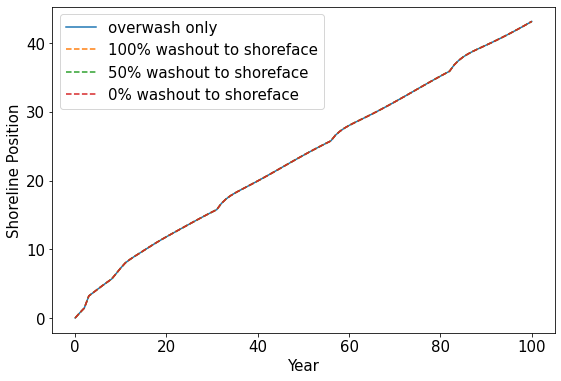

In [16]:
m_xsTS_0 = np.subtract(cascade_outwash0.barrier3d[0].x_s_TS, cascade_outwash0.barrier3d[0].x_s_TS[0])
m_xsTS_0 = np.multiply(m_xsTS_0,10)

plt.xlabel("time")
plt.ylabel("shoreline position")

plt.plot(m_xsTS, label="overwash only")
plt.plot(m_xsTS_100, label="100% washout to shoreface", linestyle=ls)
plt.plot(m_xsTS_50, label="50% washout to shoreface", linestyle=ls)
plt.plot(m_xsTS_0, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Shoreline Position")
plt.legend()


In [34]:
# plt.rcParams['figure.figsize'] = (12,6)

# m_xsTS_0 = np.subtract(cascade_outwash0.barrier3d[0].x_s_TS, cascade_outwash0.barrier3d[0].x_s_TS[0])
# m_xsTS_0 = np.multiply(m_xsTS_0,10)

# plt.xlabel("time")
# plt.ylabel("shoreline position")

# plt.plot(m_xsTS, label="landward-directed flows")
# # plt.plot(m_xsTS_100, label="100% washout to shoreface", linestyle=ls)
# # plt.plot(m_xsTS_50, label="50% washout to shoreface", linestyle=ls)
# plt.plot(m_xsTS_0, label="landward- and seaward-directed flows", linestyle="solid")

# plt.xlabel("Year")
# plt.ylabel("Barrier Migration (m)")
# plt.legend()


## avg interior elevation

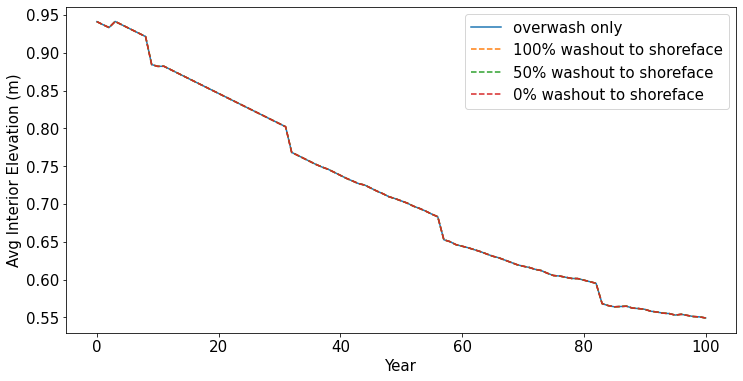

In [18]:
hbTS = np.array(cascade_b3d_only.barrier3d[0].h_b_TS)*10
hbTS2 = np.array(cascade_outwash100.barrier3d[0].h_b_TS)*10
hbTS3 = np.array(cascade_outwash50.barrier3d[0].h_b_TS)*10
hbTS4 = np.array(cascade_outwash0.barrier3d[0].h_b_TS)*10

# plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams.update({"font.size": 15})

plt.plot(hbTS, label="overwash only")
plt.plot(hbTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(hbTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(hbTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Avg Interior Elevation (m)")
plt.legend()
# plt.title("Avg Interior Elevation (m)")

## avg barrier width 

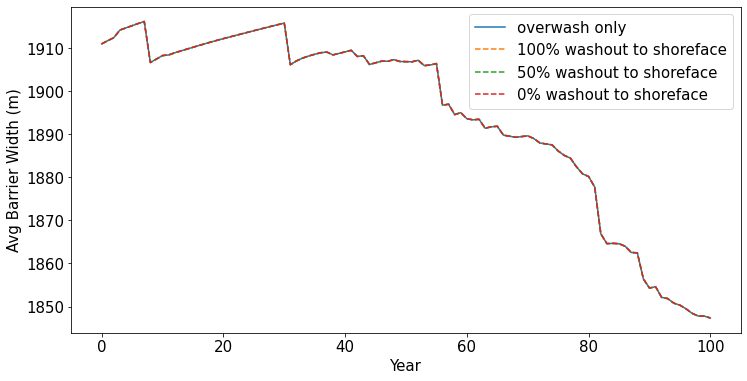

In [19]:
xbTS = np.array(cascade_b3d_only.barrier3d[0].x_b_TS)*10
xbTS2 = np.array(cascade_outwash100.barrier3d[0].x_b_TS)*10
xbTS3 = np.array(cascade_outwash50.barrier3d[0].x_b_TS)*10
xbTS4 = np.array(cascade_outwash0.barrier3d[0].x_b_TS)*10

plt.rcParams.update({"font.size": 15})

plt.plot(xbTS, label="overwash only")
plt.plot(xbTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(xbTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(xbTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Avg Barrier Width (m)")
plt.legend()


## overwash flux

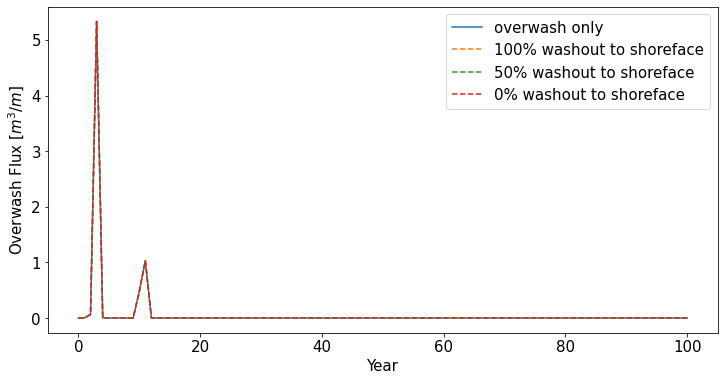

In [36]:
OWTS = cascade_b3d_only.barrier3d[0].QowTS #m3/m
OWTS2 = cascade_outwash100.barrier3d[0].QowTS #m3/m
OWTS3 = cascade_outwash50.barrier3d[0].QowTS #m3/m
OWTS4 = cascade_outwash0.barrier3d[0].QowTS #m3/m

plt.rcParams['figure.figsize'] = (12,6)

plt.plot(OWTS, label="overwash only")
plt.plot(OWTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(OWTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(OWTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Overwash Flux [$m^3/m$]")
plt.legend()
# plt.title("Overwash")

## Outwash Volume

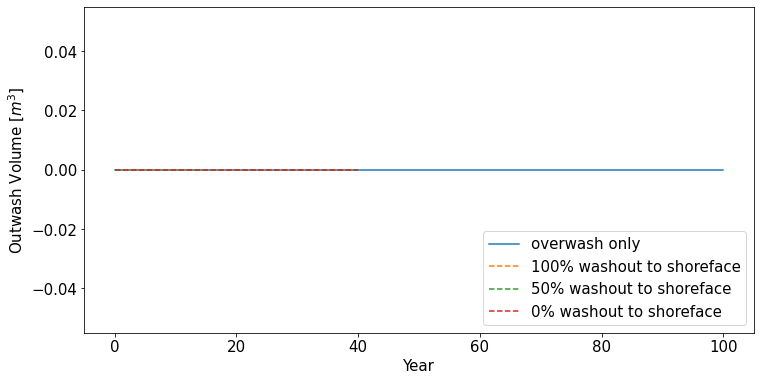

In [21]:
volTS = cascade_b3d_only.outwash[0]._outwash_TS #m3/m
volTS2 = cascade_outwash100.outwash[0]._outwash_TS #m3/m
volTS3 = cascade_outwash50.outwash[0]._outwash_TS #m3/m
volTS4 = cascade_outwash0.outwash[0]._outwash_TS #m3/m

plt.plot(volTS, label="overwash only")
plt.plot(volTS2[0:41], label="100% washout to shoreface", linestyle=ls)
plt.plot(volTS3[0:41], label="50% washout to shoreface", linestyle=ls)
plt.plot(volTS4[0:41], label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Outwash Volume [$m^3$]")
plt.legend(loc="lower right")

# plt.title("Overwash")

## Outwash Flux

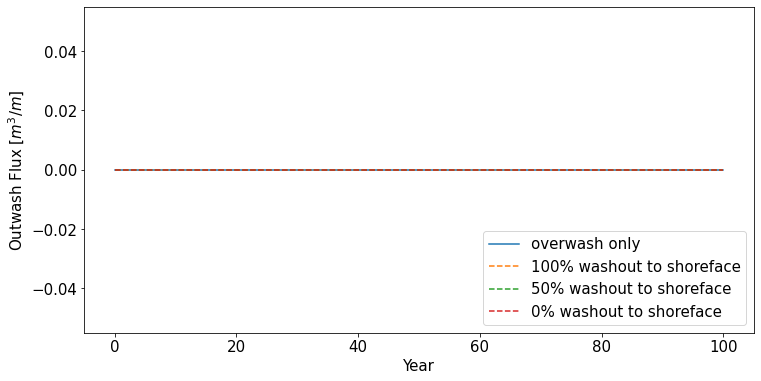

In [22]:
fluxTS = cascade_b3d_only.outwash[0]._outwash_flux_TS #m3/m
fluxTS2 = cascade_outwash100.outwash[0]._outwash_flux_TS #m3/m
fluxTS3 = cascade_outwash50.outwash[0]._outwash_flux_TS #m3/m
fluxTS4 = cascade_outwash0.outwash[0]._outwash_flux_TS #m3/m

plt.plot(fluxTS, label="overwash only")
plt.plot(fluxTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(fluxTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(fluxTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Outwash Flux [$m^3/m$]")
plt.legend(loc="lower right")
# plt.title("Overwash")

## shoreface slope

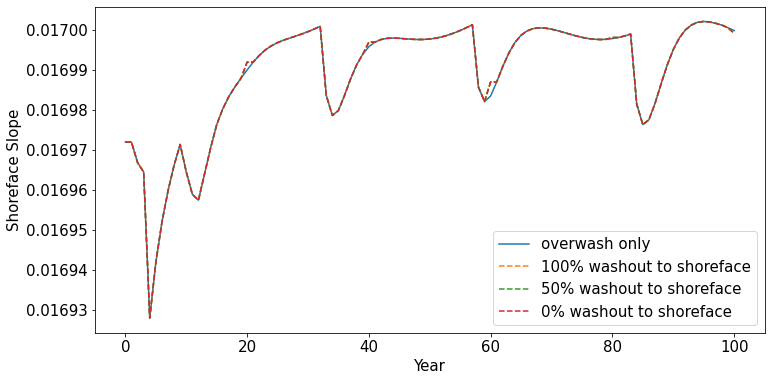

In [23]:
sfTS = cascade_b3d_only.barrier3d[0].s_sf_TS 
sfTS2 = cascade_outwash100.barrier3d[0].s_sf_TS 
sfTS3 = cascade_outwash50.barrier3d[0].s_sf_TS 
sfTS4 = cascade_outwash0.barrier3d[0].s_sf_TS 

# plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams.update({"font.size": 15})

plt.plot(sfTS, label="overwash only")
plt.plot(sfTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(sfTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(sfTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Shoreface Slope")
plt.legend()
# plt.title("Shoreface Slope")

## Dunes

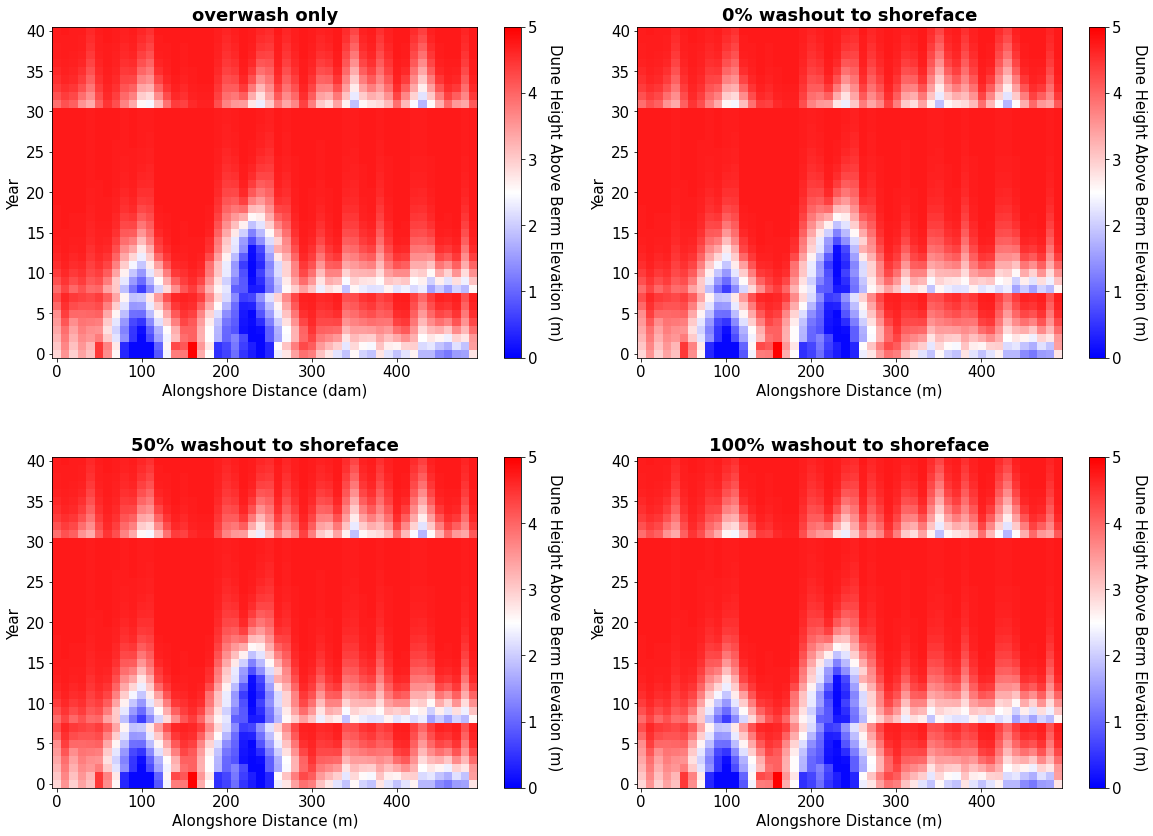

In [24]:
TMAX=41
vmin=0
vmax=5


# Barrier3d only

b3d = cascade_b3d_only.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

duneFig = plt.figure(figsize=(20, 14))
plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(221)
cax = ax.matshow(
    (DuneCrest) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=5,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (dam)")
plt.ylabel("Year")
plt.title("overwash only", weight="bold")
# plt.hlines(20, -0.5, 49.5, color="k", linestyles='dashed', linewidth=1)

xtick_max = np.shape(DuneCrest)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
plt.xticks(x_ticks, x_tick_labels)

# cascade 100%

b3d = cascade_outwash100.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(224)
cax = ax.matshow(
    (DuneCrest) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=5,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("100% washout to shoreface", weight="bold")
plt.xticks(x_ticks, x_tick_labels)

# cascade 50%

b3d = cascade_outwash50.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(223)
cax = ax.matshow(
    (DuneCrest) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=5,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("50% washout to shoreface", weight="bold")
plt.xticks(x_ticks, x_tick_labels)

# cascade 0%

b3d = cascade_outwash0.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(222)
cax = ax.matshow(
    (DuneCrest) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=5,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("0% washout to shoreface", weight="bold")
plt.xticks(x_ticks, x_tick_labels)
# plt.hlines(20, -0.5, 49.5, color="k", linestyles='dashed', linewidth=1)


plt.subplots_adjust(hspace=0.3, wspace=0.1)

# elevation plots

In [25]:
out_plt.plot_ElevAnimation(
    dunes=cascade_b3d_only.barrier3d[0]._DuneDomain, 
    interior=cascade_b3d_only.barrier3d[0]._DomainTS, 
    directory="C:/Users/Lexi/Documents/Research/Thesis/left_seg_max/b3d_only/", 
    start=0, 
    stop=cascade_b3d_only.barrier3d[0].TMAX, 
    freq=1,
    berm_el=cascade_b3d_only.barrier3d[0].BermEl)

[ * elevation GIF successfully generated * ]


In [26]:
out_plt.plot_ElevAnimation(
    dunes=cascade_outwash100.barrier3d[0]._DuneDomain, 
    interior=cascade_outwash100.barrier3d[0]._DomainTS, 
    directory="C:/Users/Lexi/Documents/Research/Thesis/left_seg/cascade100/", 
    start=0, 
    stop=cascade_outwash100.barrier3d[0].TMAX, 
    freq=1,
    berm_el=cascade_outwash100.barrier3d[0].BermEl)

[ * elevation GIF successfully generated * ]


In [27]:
out_plt.plot_ElevAnimation(
    dunes=cascade_outwash50.barrier3d[0]._DuneDomain, 
    interior=cascade_outwash50.barrier3d[0]._DomainTS, 
    directory="C:/Users/Lexi/Documents/Research/Thesis/left_seg/cascade50/", 
    start=0, 
    stop=cascade_outwash50.barrier3d[0].TMAX, 
    freq=1, 
    berm_el=cascade_outwash50.barrier3d[0].BermEl)

[ * elevation GIF successfully generated * ]


In [28]:
out_plt.plot_ElevAnimation(
    dunes=cascade_outwash0.barrier3d[0]._DuneDomain, 
    interior=cascade_outwash0.barrier3d[0]._DomainTS, 
    directory="C:/Users/Lexi/Documents/Research/Thesis/left_seg/cascade0/", 
    start=0, 
    stop=cascade_outwash0.barrier3d[0].TMAX, 
    freq=1, 
    berm_el=cascade_outwash50.barrier3d[0].BermEl)

[ * elevation GIF successfully generated * ]


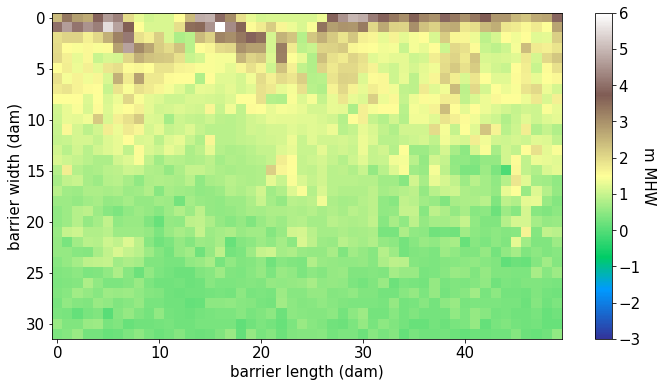

In [29]:
dunes = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[0]) + cascade_outwash0.barrier3d[0].BermEl
interior = cascade_outwash0.barrier3d[0]._DomainTS[0] 
domain = np.vstack([dunes, interior])

min_v = -3
max_v = 6

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    domain*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()


Text(0.5, 5.5, 'Light Grey = submerged cells \nDark Grey = downhill cells \nBlack = end cells')

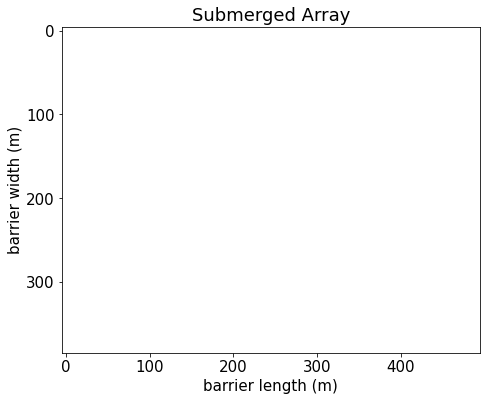

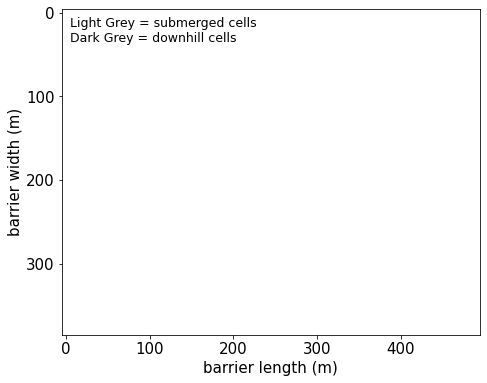

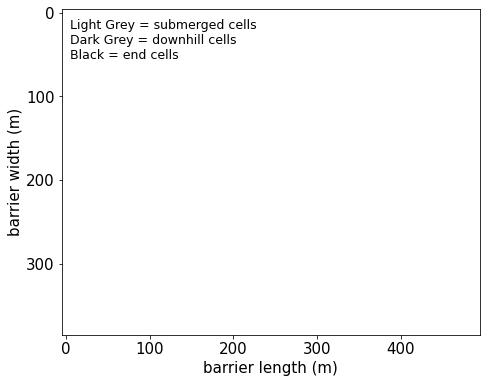

In [30]:
uw = cascade_outwash100.outwash[0]._underwater_array[20][500]
dh = cascade_outwash100.outwash[0]._downhill_array[20][500]
end = cascade_outwash100.outwash[0]._endcell_array[20][500]

plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams.update({"font.size": 15})

fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
mat4 = ax4.matshow(
    uw,
    cmap="binary",
    vmin=0, vmax=3,
)
ax4.set_xlabel('barrier length (m)')
ax4.set_ylabel('barrier width (m)')
ax4.set_title("Submerged Array")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(uw)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(uw)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
mat4 = ax4.matshow(
    dh,
    cmap="binary",
    vmin=0, vmax=3,
)
ax4.set_xlabel('barrier length (m)')
ax4.set_ylabel('barrier width (m)')
# ax4.set_title("Downhill and Underwater Cells")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(dh)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(dh)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)
plt.text(0.5, 3.5, "Light Grey = submerged cells \nDark Grey = downhill cells", fontsize="small")


fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
mat4 = ax4.matshow(
    end,
    cmap="binary",
    vmin=0, vmax=3,
)
ax4.set_xlabel('barrier length (m)')
ax4.set_ylabel('barrier width (m)')
# ax4.set_title("Endcell Array")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(end)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(end)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)
plt.text(0.5, 5.5, "Light Grey = submerged cells \nDark Grey = downhill cells \nBlack = end cells", fontsize="small")
# plt.hlines(32.5, -0.5, 49.5, color="k", linestyles='solid', linewidth=1)
# plt.hlines(34.5, -0.5, 49.5, color="k", linestyles='solid', linewidth=1)

NameError: name 'init_dis2' is not defined

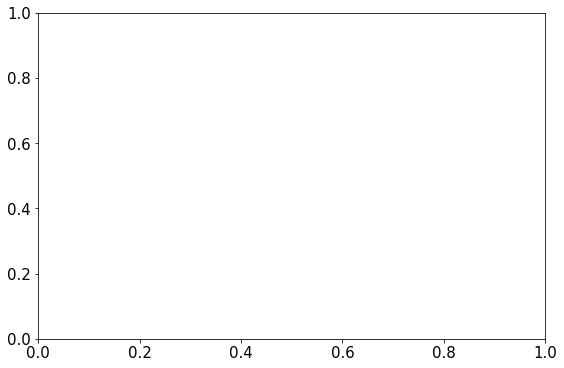

In [31]:
plt.rcParams['figure.figsize'] = (20,6)
plt.rcParams.update({"font.size": 15})
# plt.plot(cascade_outwash100.outwash[0]._final_bay_levels)
# np.argmax(cascade_outwash100.outwash[0]._final_bay_levels)

# init_dis2 = cascade_outwash100.outwash[0]._initial_discharge[20][360] 
# discharge2 = cascade_outwash100.outwash[0]._discharge[20][360]
# row = np.shape(init_dis)[0]
# col = np.shape(init_dis)[1]
# for r in range(row):
#     for c in range(col):
#         init_dis2[r,c] = init_dis2[r,c]*1000/3600
#         discharge2[r,c] = discharge2[r,c]*1000/3600


fig4 = plt.figure()
ax4 = fig4.add_subplot(121)
mat4 = ax4.matshow(
    init_dis2,
    cmap="Blues",
    vmin=0, 
    vmax=20,
)
ax4.set_xlabel('barrier length (m)')
ax4.set_ylabel('barrier width (m)')
ax4.set_title("Initial Discharge")
plt.gca().xaxis.tick_bottom()
cbar = fig4.colorbar(mat4)
cbar.set_label('m$^3$/s', rotation=270, labelpad=25)
xtick_max = np.shape(init_dis)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(init_dis)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


ax4 = fig4.add_subplot(122)
mat4 = ax4.matshow(
    discharge2,
    cmap="Blues",
    vmin=0, 
    vmax=200,
)
ax4.set_xlabel('barrier length (m)')
ax4.set_ylabel('barrier width (m)')
ax4.set_title("Discharge After Flow Routing")
plt.gca().xaxis.tick_bottom()
cbar = fig4.colorbar(mat4)
cbar.set_label('m$^3$/s', rotation=270, labelpad=25)
xtick_max = np.shape(discharge)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(discharge)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

print(cascade_outwash100.outwash[0]._final_bay_levels[360])
plt.hlines(32.5, -0.5, 49.5, color="k", linestyles='solid', linewidth=1)
plt.hlines(34.5, -0.5, 49.5, color="k", linestyles='solid', linewidth=1)

In [ ]:
# initial = cascade_outwash100.barrier3d[0].DomainTS[19]
# final = cascade_outwash100.barrier3d[0].DomainTS[20]
# # change = final-initial

# plt.rcParams['figure.figsize'] = (30,10)
# plt.rcParams.update({"font.size": 20})

# shrink=0.5

# fig1 = plt.figure()
# fig1.tight_layout()
# fig1.suptitle('Configuration 1: Modeled Erosion', weight="bold")
# ax1 = fig1.add_subplot(131)
# mat = ax1.matshow(
#     initial*10,
#     cmap="terrain",
#     vmin=-3.0,
#     vmax=6.0,
# )
# cbar = fig1.colorbar(mat, shrink=shrink)
# cbar.set_label('m MHW', rotation=270, labelpad=5)
# ax1.set_title("Pre-Storm Elevation")
# ax1.set_ylabel("barrier width (m)")
# ax1.set_xlabel("barrier length (m)")
# plt.gca().xaxis.tick_bottom()
# xtick_max = np.shape(initial)[1]  # n_cols = x
# x_ticks = np.array(range(0, xtick_max, 10))
# x_tick_labels = x_ticks * 10
# ytick_max = np.shape(initial)[0]  # n_rows = y
# y_ticks = np.array(range(0, ytick_max, 10))
# y_tick_labels = y_ticks * 10
# plt.xticks(x_ticks, x_tick_labels)
# plt.yticks(y_ticks, y_tick_labels)


# ax2 = fig1.add_subplot(132)
# mat = ax2.matshow(
#     final*10,
#     cmap="terrain",
#     vmin=-3.0,
#     vmax=6.0,
# )
# cbar = fig1.colorbar(mat, shrink=shrink)
# cbar.set_label('m MHW', rotation=270, labelpad=5)
# ax2.set_title("Post-Storm Elevation")
# ax2.set_ylabel("barrier width (m)")
# ax2.set_xlabel("barrier length (m)")
# plt.gca().xaxis.tick_bottom()
# xtick_max = np.shape(final)[1]  # n_cols = x
# x_ticks = np.array(range(0, xtick_max, 10))
# x_tick_labels = x_ticks * 10
# ytick_max = np.shape(final)[0]  # n_rows = y
# y_ticks = np.array(range(0, ytick_max, 10))
# y_tick_labels = y_ticks * 10
# plt.xticks(x_ticks, x_tick_labels)
# plt.yticks(y_ticks, y_tick_labels)
# # ax2.tick_params(left=False)
# # ax2.set(yticklabels=[])
# # fig2.subplots_adjust(wspace=0.3, hspace=0)

# # # fig3 = plt.figure()
# # ax3 = fig1.add_subplot(133)
# # mat = ax3.matshow(
# #     change*10,
# #     cmap="seismic",
# #     vmin=-5,
# #     vmax=5,
# # )

# # cbar = fig1.colorbar(mat, shrink=shrink)
# # cbar.set_label('meters', rotation=270, labelpad=5)
# # ax3.set_title("Elevation Change")
# # ax3.set_ylabel("barrier width (m)")
# # ax3.set_xlabel("barrier length (m)")
# # plt.gca().xaxis.tick_bottom()

# # # ax3.add_patch(plt.Rectangle((13,30), 24, -27, lw=3, ec="k", fc="none"))

# # xtick_max = np.shape(change)[1]  # n_cols = x
# # x_ticks = np.array(range(0, xtick_max, 10))
# # x_tick_labels = x_ticks * 10
# # ytick_max = np.shape(change)[0]  # n_rows = y
# # y_ticks = np.array(range(0, ytick_max, 10))
# # y_tick_labels = y_ticks * 10
# # plt.xticks(x_ticks, x_tick_labels)
# # plt.yticks(y_ticks, y_tick_labels)
# # fig1.subplots_adjust(top=1.15, wspace=0.3, hspace=0)



In [ ]:
def calculate_slopes(
        domain,
        width,
        length,
        time_step,
        s1_vals,
        s2_vals,
        s3_vals,
):
    """
    takes the elevations and differentiates uphill and downhill regions based on an average slope of
    a block of cells
    :param domain: elevation array
    :param width: cross-shore barrier width
    :param length: alongshore barrier length
    :param time_step: current time step of the storm
    :param s1_vals: array used to store the S1 slope values for each time step, row, and column
    :param s2_vals: array used to store the S2 slope values for each time step, row, and column
    :param s3_vals: array used to store the S3 slope values for each time step, row, and column
    :return truth_array: array of 1s and 0s indicating downhill and uphill (respectively) slopes for future flow
            routing determination
    """
    # ### Calculate Slopes
    for row in range(width):  # for letting sediment out, discharge scenarios 2 and 3
        for col in range(length):
            # if we are not at the last row, do normal calculations
            if row != width - 1:  # uncomment if we are letting sed out the last row
                # tab everything until else statement
                if col > 0:  # i = 0 means there are no cols to the left
                    S1 = (domain[row, col] - domain[row + 1, col - 1]) / (math.sqrt(2))
                    S1 = np.nan_to_num(S1)
                else:
                    S1 = 0

                S2 = domain[row, col] - domain[row + 1, col]
                S2 = np.nan_to_num(S2)

                if col < (length - 1):  # i at the end length means there are no cols to the right
                    S3 = (domain[row, col] - domain[row + 1, col + 1]) / (math.sqrt(2))
                    S3 = np.nan_to_num(S3)
                else:
                    S3 = 0
            # if at the last row, apply the same slope as the beachface slope
            else:
                if col > 0:  # i = 0 means there are no cols to the left
                    S1 = (domain[row - 1, col] - domain[row, col - 1]) / (math.sqrt(2))
                    S1 = np.nan_to_num(S1)
                else:
                    S1 = 0

                S2 = domain[row - 1, col] - domain[row, col]
                S2 = np.nan_to_num(S2)

                if col < (length - 1):  # i at the end length means there are no cols to the right
                    S3 = (domain[row - 1, col] - domain[row, col + 1]) / (math.sqrt(2))
                    S3 = np.nan_to_num(S3)
                else:
                    S3 = 0

            # if col == 0 and S2 < 0 and S3 < 0:
            if col == 0:
                # this is greater than the max slope, so no sediment will go to outside
                S1 = -999
            # if col == length - 1 and S2 < 0 and S1 < 0:
            if col == length - 1:
                S3 = -999

            s1_vals[time_step, row, col] = S1
            s2_vals[time_step, row, col] = S2
            s3_vals[time_step, row, col] = S3

    return s1_vals, s2_vals, s3_vals,

In [ ]:
import math
avg_array = []

for t in range(1,101):
    width = np.shape(cascade_b3d_only.barrier3d[0].DomainTS[t])[0]
    length = np.shape(cascade_b3d_only.barrier3d[0].DomainTS[t])[1]
    domain = cascade_b3d_only.barrier3d[0].DomainTS[t]
    TS = t

    s1_array = np.zeros([1, width, length])
    s2_array = np.zeros([1, width, length])
    s3_array = np.zeros([1, width, length])

    s1_array, s2_array, s3_array = calculate_slopes(
        domain=domain,
        width=width,
        length=length,
        time_step=0,
        s1_vals=s1_array,
        s2_vals=s2_array,
        s3_vals=s3_array,
    )
    
    avg_array.append(np.mean(s2_array))

In [ ]:
dunes = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[0]) + cascade_outwash0.barrier3d[0].BermEl
interior = cascade_outwash0.barrier3d[0]._DomainTS[0] 
domain = np.vstack([dunes, interior])

min_v = -3
max_v = 6

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    domain*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()


# domain 19 
dunes19 = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[19]) + cascade_outwash0.barrier3d[0].BermEl
interior19 = cascade_outwash0.barrier3d[0]._DomainTS[19] 
domain19 = np.vstack([dunes19, interior19])
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    domain19*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# domain 20 
dunes20 = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[21]) + cascade_outwash0.barrier3d[0].BermEl
interior20 = cascade_outwash0.barrier3d[0]._DomainTS[21] 
domain20 = np.vstack([dunes20, interior20])
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    domain20*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# domain 39 
dunes39 = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[39]) + cascade_outwash0.barrier3d[0].BermEl
interior39 = cascade_outwash0.barrier3d[0]._DomainTS[39] 
domain39 = np.vstack([dunes39, interior39])
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    domain39*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

In [32]:
print(cascade_b3d_only.barrier3d[0]._Dmaxel)

0.584


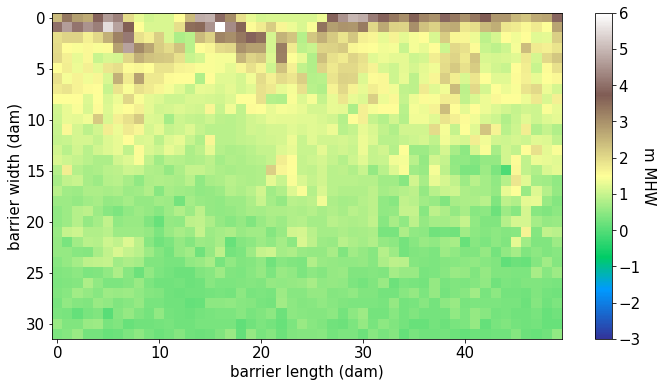

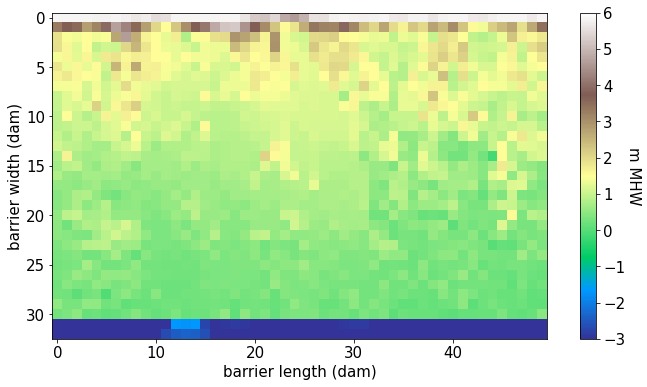

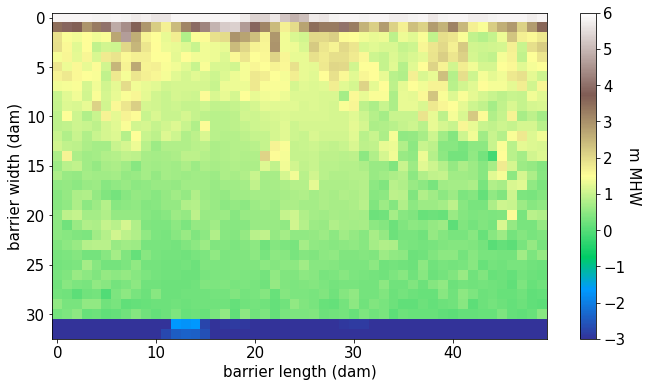

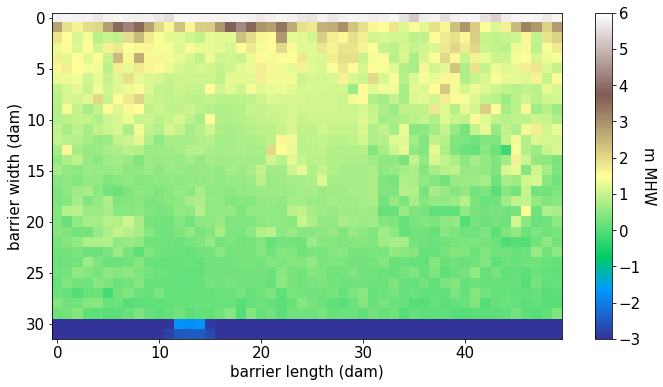

In [35]:
dunes = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[0]) + cascade_outwash0.barrier3d[0].BermEl
interior = cascade_outwash0.barrier3d[0]._DomainTS[0] 
domain = np.vstack([dunes, interior])

min_v = -3
max_v = 6

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    domain*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()


# domain 19 
dunes19 = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[19]) + cascade_outwash0.barrier3d[0].BermEl
interior19 = cascade_outwash0.barrier3d[0]._DomainTS[19] 
domain19 = np.vstack([dunes19, interior19])
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    domain19*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# domain 20 
dunes20 = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[20]) + cascade_outwash0.barrier3d[0].BermEl
interior20 = cascade_outwash0.barrier3d[0]._DomainTS[20] 
domain20 = np.vstack([dunes20, interior20])
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    domain20*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# domain 39 
dunes39 = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[39]) + cascade_outwash0.barrier3d[0].BermEl
interior39 = cascade_outwash0.barrier3d[0]._DomainTS[39] 
domain39 = np.vstack([dunes39, interior39])
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    domain39*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# # change 
# change = domain20-domain19[0:35]
# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)
# # fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
# mat = ax1.matshow(
#     change*10,
#     cmap="seismic",
#     vmin=-2, vmax=2,
# )
# cbar = fig1.colorbar(mat)
# cbar.set_label('m MHW', rotation=270, labelpad=15)
# # ax1.set_title("")
# ax1.set_ylabel("barrier width (dam)")
# ax1.set_xlabel("barrier length (dam)")
# plt.gca().xaxis.tick_bottom()